<a href="https://colab.research.google.com/github/PrajaktaChakraborty/Cardiovascular-Disease-Prediction/blob/main/Cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report

In [2]:
#reading the data set
heart = pd.read_csv("/content/drive/MyDrive/Dataset/cardio_train (1).csv")
heart

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# To display the top 5 rows
heart.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# To display the bottom 5 rows
heart.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
# To display shape of the dataset
heart.shape

(70000, 13)

In [6]:
# to display all column names
heart.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
# To display info details
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
# To display unique values
heart.nunique()

,0
id,70000
age,8076
gender,2
height,109
weight,287
ap_hi,153
ap_lo,157
cholesterol,3
gluc,3
smoke,2


In [9]:
# description of the dataset
heart.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# To check the number of duplicated values
heart.duplicated().sum()

0

In [11]:
# to check is there any null values and their sum count
heart.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [12]:
#Find Age Given Data
heart['age'] = heart['age'].apply(lambda x: x/365)

In [13]:
heart['age'] = heart['age'].apply(lambda x: int(x))

In [14]:
heart.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
X = heart.drop('cardio', axis=1)
y = heart['cardio']

In [16]:
#Data Transformation
y = pd.get_dummies(y) # OHE
y.head()

,0,1
0,True,False
1,False,True
2,False,True
3,False,True
4,True,False


# **Data Analysis And Visualizations**

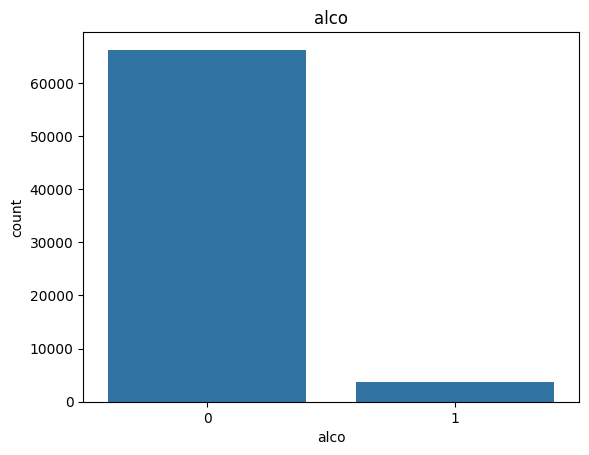

In [17]:
# Exploring the target variable
sns.countplot(x='alco', data=heart)
plt.title('alco')
plt.show()

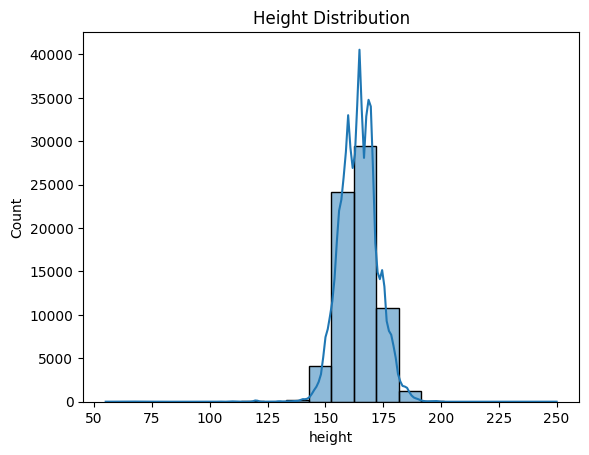

In [18]:
# Visualize the distribution of 'height'
sns.histplot(heart['height'], bins=20, kde=True)
plt.title('Height Distribution')
plt.show()

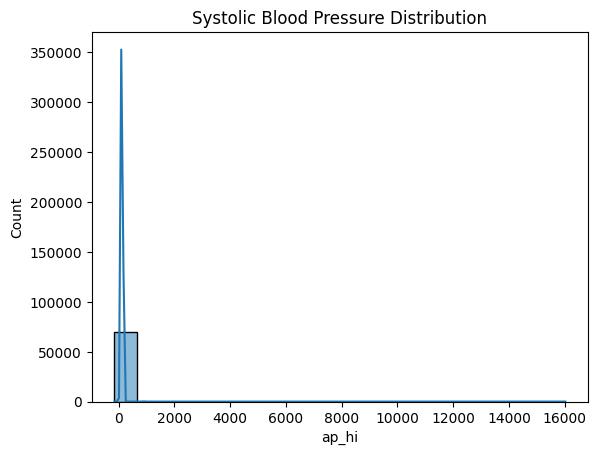

In [19]:
# Visualize the distribution of 'ap_hi' (systolic blood pressure)
sns.histplot(heart['ap_hi'], bins=20, kde=True)
plt.title('Systolic Blood Pressure Distribution')
plt.show()

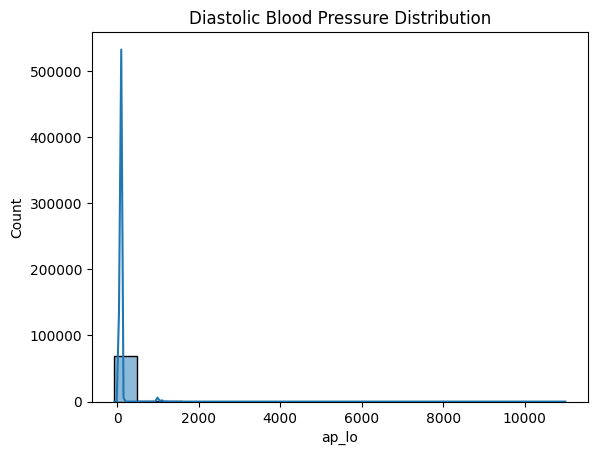

In [20]:
# Visualize the distribution of 'ap_lo' (diastolic blood pressure)
sns.histplot(heart['ap_lo'], bins=20, kde=True)
plt.title('Diastolic Blood Pressure Distribution')
plt.show()

<Axes: >

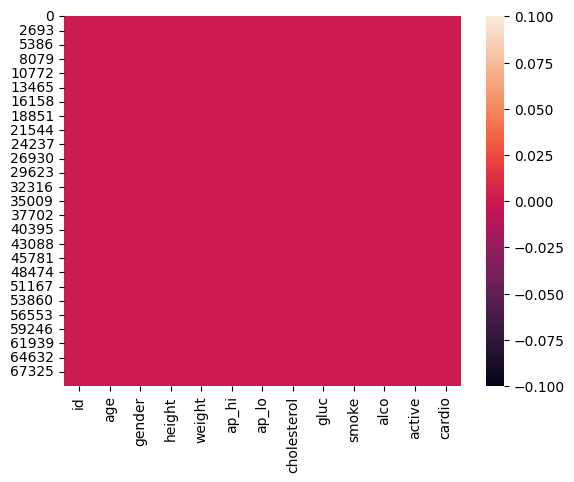

In [21]:
# heatmap for null values
sns.heatmap(heart.isnull())

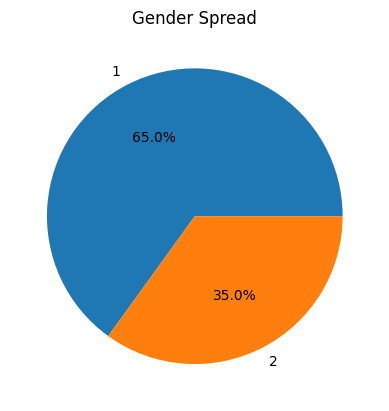

In [22]:
gender_spread = heart['gender'].value_counts()
gender_spread.plot.pie(autopct='%1.1f%%')
plt.title("Gender Spread")
plt.ylabel('')
plt.show()

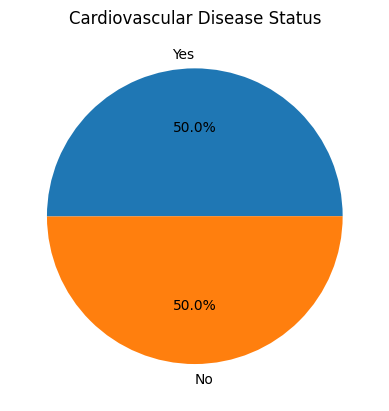

In [23]:
disease_status = heart['cardio'].value_counts()
disease_status.plot.pie(autopct='%1.1f%%', labels=['Yes', 'No'])
plt.title("Cardiovascular Disease Status")
plt.ylabel('')
plt.show()

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>,
        <Axes: title={'center': 'cholesterol'}>],
       [<Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>,
        <Axes: title={'center': 'active'}>],
       [<Axes: title={'center': 'cardio'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

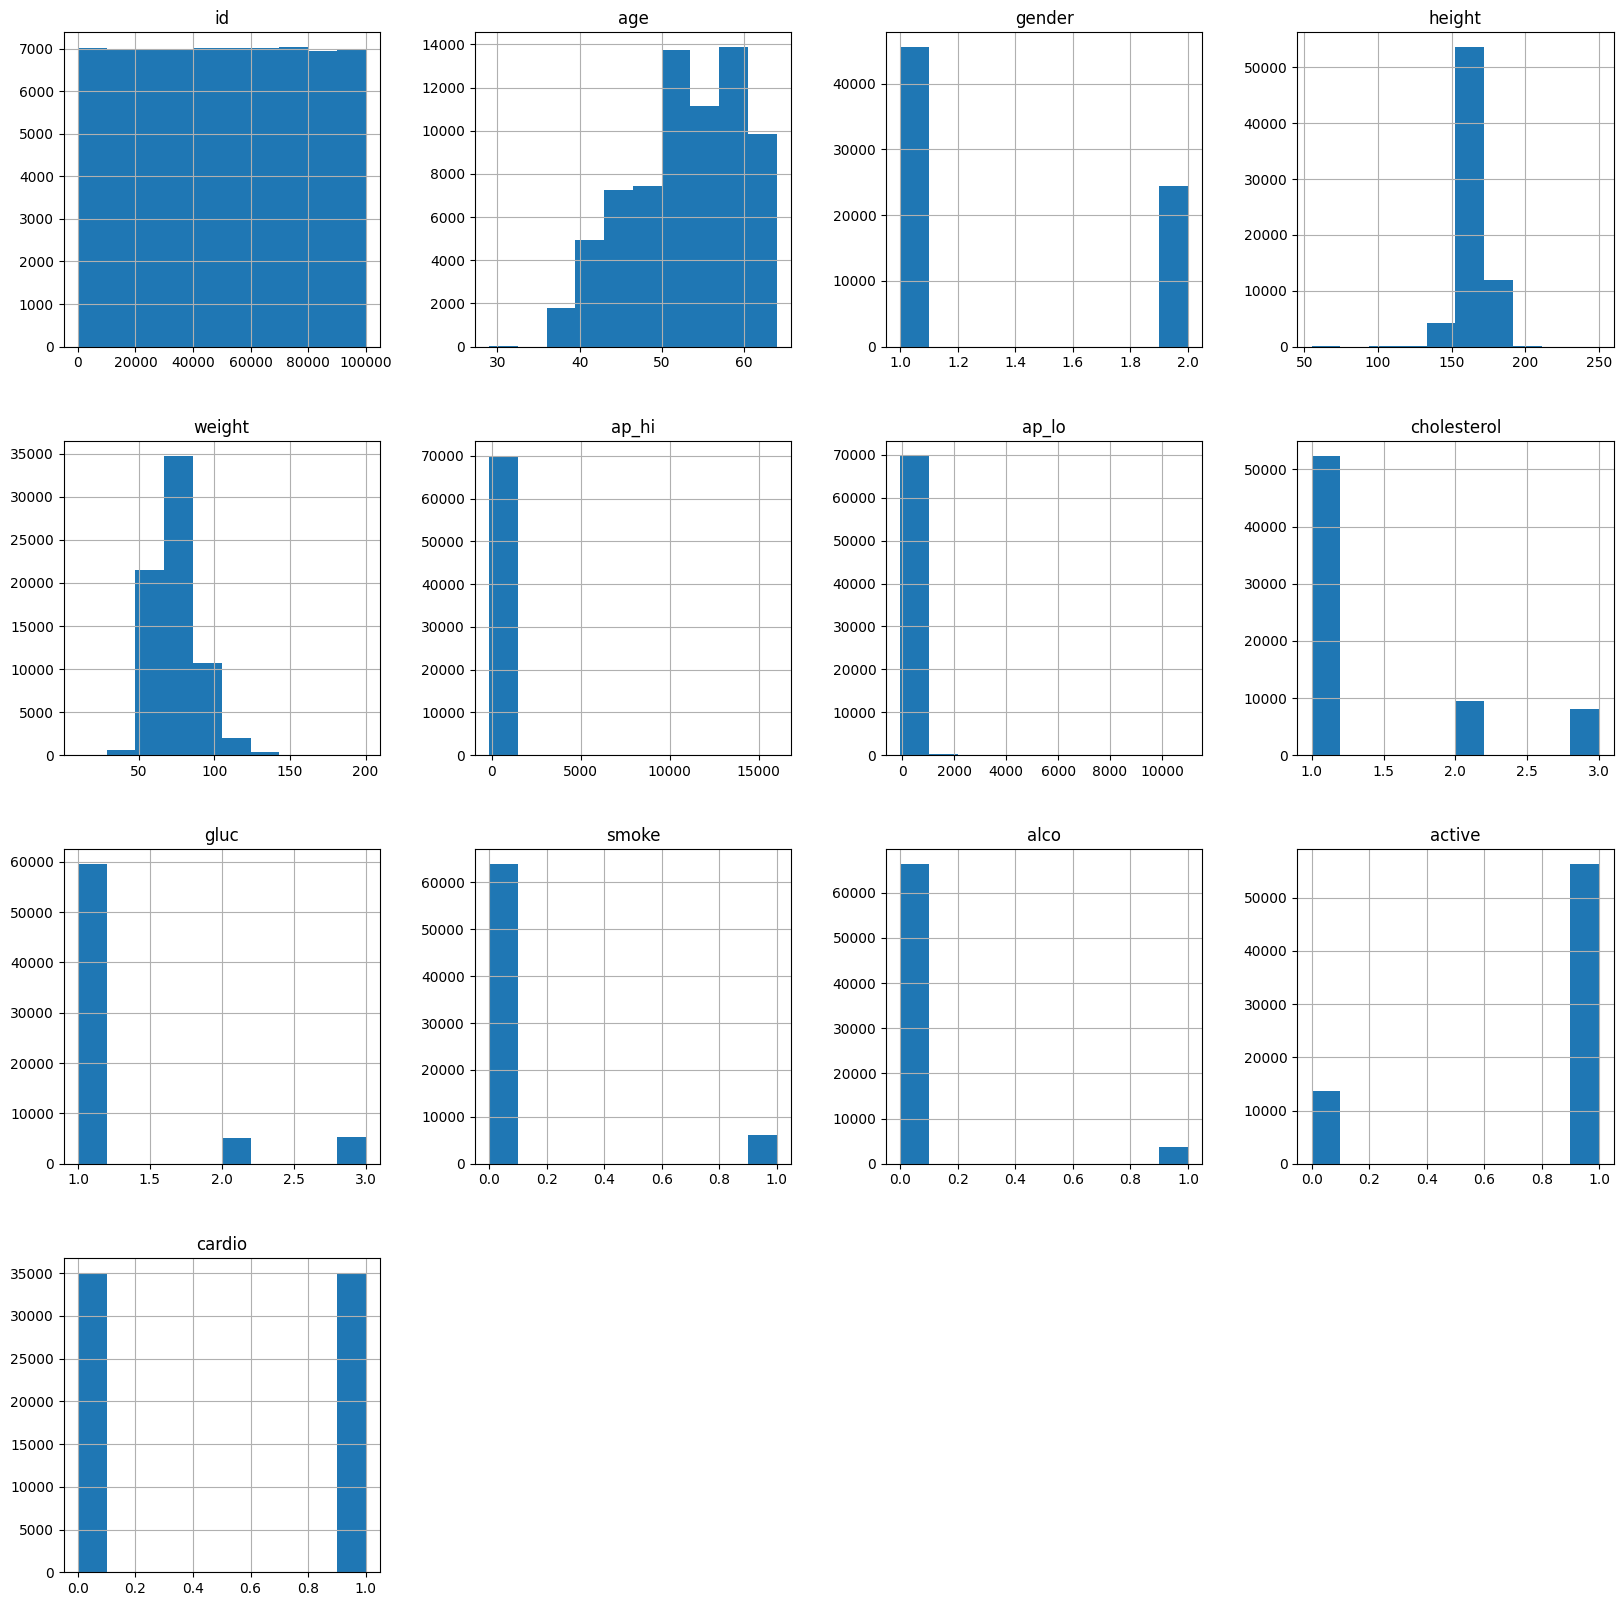

In [24]:
# see how the data is distributed.
heart.hist(figsize = (20,20))

# **Correlation** **Matrix**

In [25]:
# Correlation
heart.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


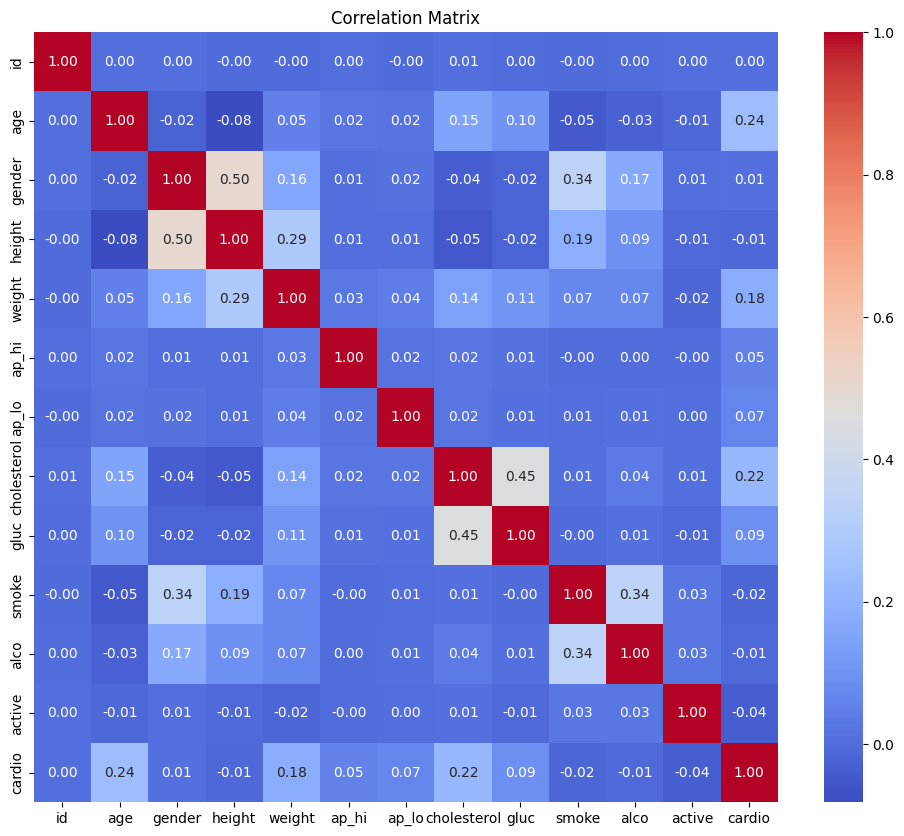

In [26]:
# Calculate the correlation matrix
correlation_matrix = heart.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [27]:
TARGET="cardio"

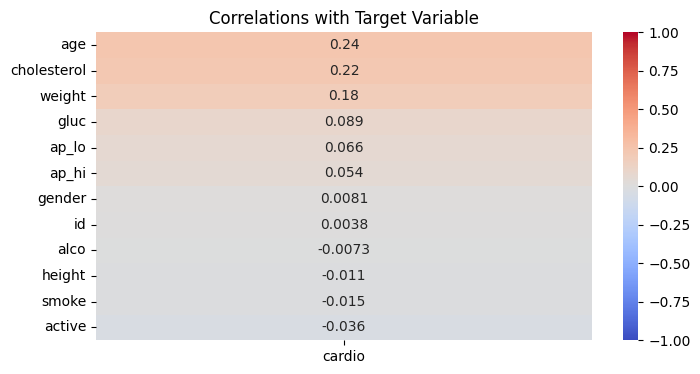

In [28]:
correlation_matrix = heart.corr()

#We only take the correlations with 'target'.
target_correlation = correlation_matrix[TARGET].sort_values(ascending=False)
target_correlation = target_correlation.drop("cardio")

plt.figure(figsize=(8, 4))
sns.heatmap(target_correlation.to_frame(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title("Correlations with Target Variable")
plt.show()

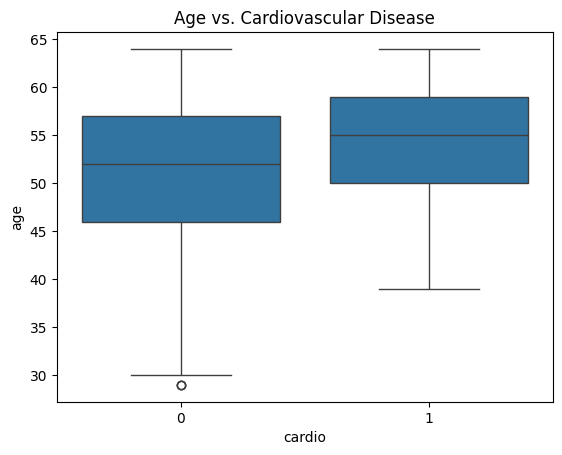

In [31]:
# Visualize the relationship between 'age' and 'cardio'
sns.boxplot(x='cardio', y='age', data=heart)
plt.title('Age vs. Cardiovascular Disease')
plt.show()

# **Find Out Accuracy Levels Of Various Machine Learning Techniques**

In [32]:
from sklearn.model_selection import train_test_split

#define x and y values as x is all columns except outcome and y is Outcome
X = heart.drop("cardio",axis=1)
y = heart["cardio"]

# split dataset as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 21)

In [35]:
#Result Maximum
results.loc['Random Forest(Improved)']= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]

results.sort_values(by='Accuracy in %',ascending=False).style.highlight_max()

,Accuracy in %,F1-score
Random Forest,72.280000,0.720000
Random Forest(Improved),72.280000,0.720000
Logistic Regression,69.700000,0.690000
Decision Tree,63.550000,0.630000


In [36]:
#Result Minimum
results.loc['Random Forest(Improved)']= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]

results.sort_values(by='Accuracy in %',ascending=False).style.highlight_min()

,Accuracy in %,F1-score
Random Forest,72.280000,0.720000
Random Forest(Improved),72.280000,0.720000
Logistic Regression,69.700000,0.690000
Decision Tree,63.550000,0.630000


In [39]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)